<a href="https://colab.research.google.com/github/A-l-E-v/ML-Engineer/blob/main/Bonus_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 2. Matplotlib. Бонусный урок

## Задание


Здесь представлена часть лекционной тетради "bonus_lesson.ipynb", содержащая ячейки с дополнительными заданиями. Опираясь на лекционный материал, выполните каждое из заданий в соответствующей ячейке.


1. Получите изображения с “эффектом фильтра”
 * Для синего и зелёного цветов (просто)
 * Для фиолетового цвета (чуть сложнее)
 * Дополнительное задание: напишите функцию filter_img(img, color), которая принимает на вход изображение (в виде матрицы) и произвольный цвет (в виде массива размера три кодирующего цвет) и наложите эффект фильтра с использованием переданного цвета.
* Подсказка: эффект фильтра - это домножение каждого из трёх базовых цветов каждого пикселя исходного изображения на некоторые числа, которые связаны с цветом самого фильтра. Подумайте, что это за числа (они находятся в диапазоне от 0 до 1) и примените тот же принцип для произвольного цвета фильтра.
2. Получите изображения с “эффектом линзы”
 * Для фиолетового и жёлтого цветов (несложно)
 * Дополнительное задание: напишите функцию lens_img(img, color), которая принимает на вход изображение (в виде матрицы) и произвольный цвет (в виде массива размера три, кодирующего цвет) и наложите эффект линзы с использованием переданного цвета.
* Подсказка: эффект линзы - это увеличение интенсивности каждого базового цвета каждого пикселя исходного изображения таким образом, что интенсивность каждого из трёх базовых цветов находится между исходным значением и 255 (максимумом), причем увеличения интенсивностей каждого из трёх цветов пропорциональны некоторым числам, которые связаны с цветом самой линзы. Подумайте, что это за числа (они находятся в диапазоне от 0 до 1) и примените тот же принцип для произвольного цвета линзы.
3. Получите изображение кота из исходного таким образом, что интенсивности каждого пикселя в матрице изменятся таким образом: [r, g, b] -> [b, r, g], где r, g, b - исходные интенсивности для каждого пикселя. Если всё сделано правильно, ведро станет розового цвета.
 * Подсказка: в модуле Numpy есть функция, которая позволяет выполнить это задание в одну строку. Чтобы не мучаться, можно попробовать найти и применить её.
4. Аналогично горизонтальному, сделайте вертикальный градиент затенения: пусть есть пара чисел shade_levels_pair, где первое число будет отвечать за уровень затенения в верхней части картинки, а второе - в нижней части. Для того, чтобы это сделать, нужно аналогично случаю с горизонтальным, сделать массив с линейным градиентом от shade_levels_pair[0] до shade_levels_pair[1] с помощью np.linspace, а затем домножить каждую строку изображения на соответствующий коэффициент из линейного градиента.
 * Дополнительное задание:
Напишите функцию shade_custom(img, func, mode='vertical'), принимающую изображение в виде матрицы, функцию, которая принимает значения от 0 до 1 в диапазоне от 0 до 1 и строку, которая будет принимать лишь два значения: “vertical” (по умолчанию) или “horizontal”, и будет отвечать за то, в какую сторону мы будем применять градиент: слева направо или сверху вниз. Эта функция должна будет применять уровень затенения в той или иной части изображения в соответствии со значением функции func, применяемой в этой доли изображения. Например, в средней части изображения уровень затенения должен соответствовать func(0.5).
5. Расширьте возможности функции mask_color таким образом, чтобы она могла принимать в качестве параметра color произвольные цвета в виде массива размера три, кодирующего цвет (по сути, нужно добавить одну строку под условием “elif isinstance(color, (list, np.ndarray)):”)


### Импорт библиотек и функции

In [ ]:
# сначала импортируем нужные нам библиотеки

import numpy as np # <----- для работы с матрицами
import matplotlib.pyplot as plt # <----- для работы с изображением
import matplotlib.colors as mclr # <----- для считывания rgb-кода из цвета
from PIL import Image # <----- для правильного открытия
from scipy.stats import gaussian_kde # <----- для построения сглаживания гистограммы

## Функция для визуализации рисунка

In [ ]:
# функция для визуализации рисунка
def plot_img(img, figsize=None, **kwargs):

    if figsize is None:
        # делим на 100, потому что это количество пикселей на дюйм
        figsize = tuple(pixels/100 for pixels in img.shape[:2])

    # основная часть с построением
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img, **kwargs)
    # отключает оси в изображении
    ax.set_axis_off()

    plt.show()

## Считывание изображения

In [ ]:
# скачиваем нужные данные
FILE_ID = '1qurcmAvRk77NFGe97nQYdIjoBVJt5xqa'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O error-lolcat-problemz.jpg

--2024-10-02 12:26:46--  https://docs.google.com/uc?export=download&id=1qurcmAvRk77NFGe97nQYdIjoBVJt5xqa
Resolving docs.google.com (docs.google.com)... 74.125.204.102, 74.125.204.113, 74.125.204.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qurcmAvRk77NFGe97nQYdIjoBVJt5xqa&export=download [following]
--2024-10-02 12:26:46--  https://drive.usercontent.google.com/download?id=1qurcmAvRk77NFGe97nQYdIjoBVJt5xqa&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95275 (93K) [image/jpeg]
Saving to: ‘error-lolcat-problemz.jpg’

error-lolcat-proble 100%[===================>]  93.04K  --.-KB/s    in 0.

In [ ]:
# считываем изображение в матрицу
img = Image.open('error-lolcat-problemz.jpg')
img_arr = np.asarray(img)

## Эффекты

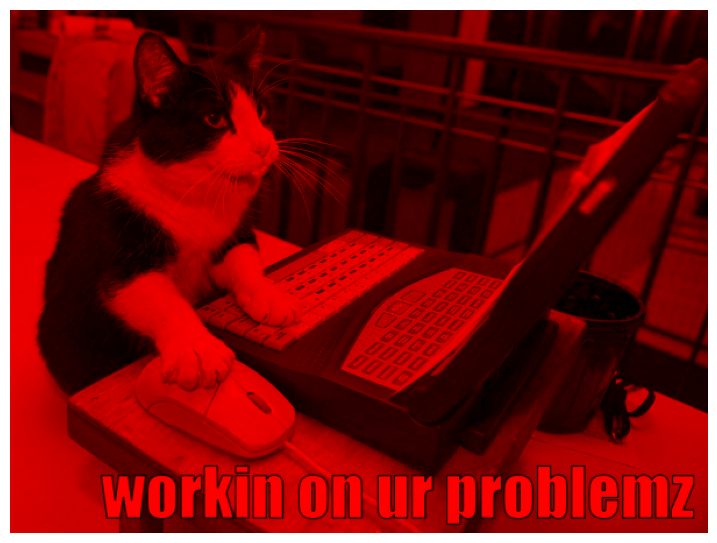

In [ ]:
# красный фильтр, как сделать остальные?
img_red = img_arr.copy()

img_red[:, :, 1] = 0
img_red[:, :, 2] = 0

plot_img(img_red, figsize=(9, 12))

In [ ]:
# ячейка для применения других фильтров

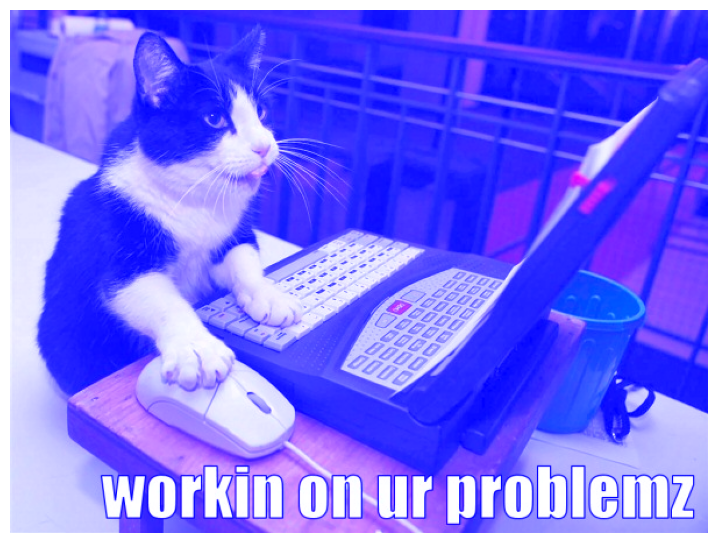

In [ ]:
# синяя линза, как сделать остальные?
img_blue_eff = img_arr.copy()

img_blue_eff[:, :, 2] = 255

plot_img(img_blue_eff, figsize=(9, 12))

In [ ]:
# ячейка для применения других линз

## Отражения

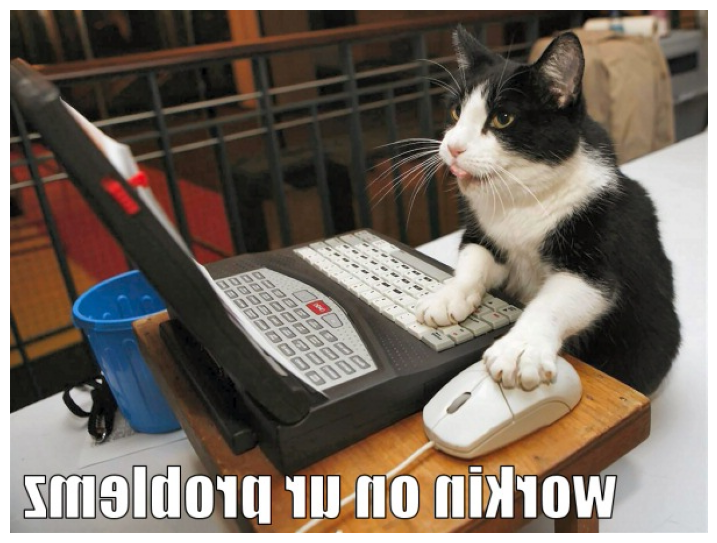

In [ ]:
img_hreverse = img_arr[:, ::-1, :]

plot_img(img_hreverse, figsize=(9, 12))

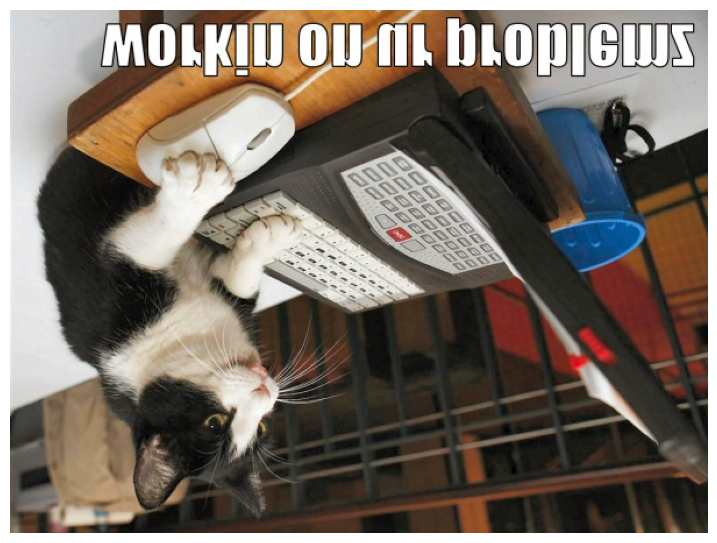

In [ ]:
img_vreverse = img_arr[::-1, :, :]

plot_img(img_vreverse, figsize=(9, 12))

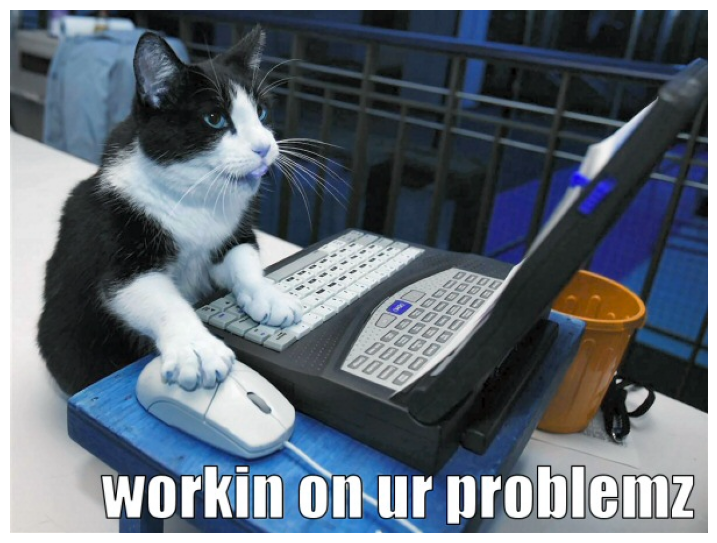

In [ ]:
# ???
img_creverse = img_arr[:, :, ::-1]

plot_img(img_creverse, figsize=(9, 12))

In [ ]:
# ячейка для другого переупорядочивания цветов

## Градиент

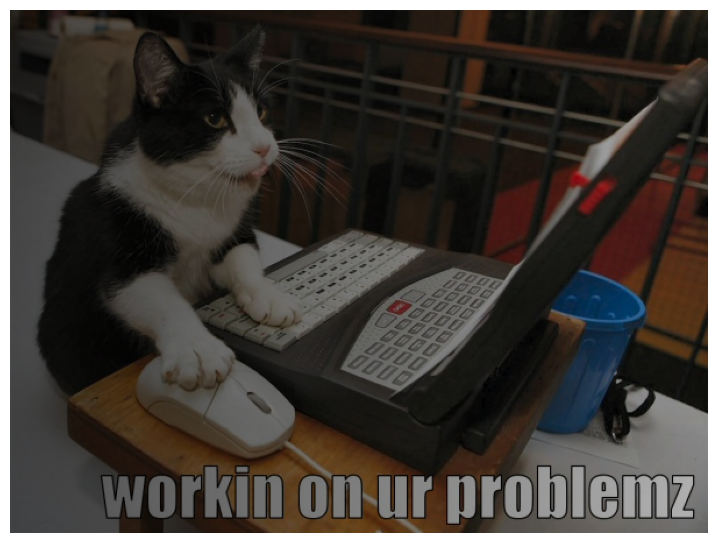

In [ ]:
# пара значений затенения: от левого до правого края
shade_levels_pair = (0.7, 0.3)

# затенение будет линейным, подумайте: а как сделать нелинейное?
shade_levels = np.linspace(*shade_levels_pair, img_arr.shape[1])
img_shaded_grad = img_arr * (1-shade_levels).reshape(600, -1).repeat(3, axis=1)

plot_img(img_shaded_grad.round().astype('int'), figsize=(9, 12))

In [ ]:
# ячейка для вертикального затенения

In [ ]:
# ячейка для нелинейного градиента

## Цветовая маска

In [ ]:
# функция для получения матрицы яркостей из rgb-изображения

def get_luminosity(img_arr):
    Red_coef = 0.2126
    Green_coef = 0.7152
    Blue_coef = 0.0722
    assert Red_coef + Green_coef + Blue_coef == 1, "sum of _coefs shold be equal to 1!"

    img_lum = Red_coef*img_arr[:, :, 0] + Green_coef*img_arr[:, :, 1] + Blue_coef*img_arr[:, :, 2]

    return img_lum

In [ ]:
def mask_color(img_path, color, sensitivity=0.95, plot_hist=True, plot_mask=True, return_mask=True):

    # считывание и перевод оригинального изображения в ч/б
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    img_lum = get_luminosity(img_arr)

    if isinstance(color, str):
        color_rgb = mclr.to_rgb(color) # получаем цвет из строки (в формате rgb от 0 до 1)!

    # чему равен color_rgb в случае произвольного цвета заданного как массив [r, g, b]?
    elif isinstance(color, (list, np.ndarray)):
        ...
    else:
        raise Exception("Color should be either a string or a list!")

    # заводим 3d ч/б изображение
    binary_channel = img_lum.reshape(*img_lum.shape, 1).repeat(3, axis=2).round().astype('int')

    # вычисляем "расстояние" между нужным нам цветом и цветами оригинального изображения попиксельно
    # чем меньше "расстояние" - тем ближе пиксель к нужному цвету
    distances = np.sqrt(((np.full(img_arr.shape, [c*255 for c in color_rgb]) - img_arr)**2).sum(axis=2))

    # исходя из значения чувствительности заводим границу,
    # начиная с которой мы считаем, что пиксель имеет нужный нам цвет
    thresh = np.quantile(distances, 1 - sensitivity)

    # строим гистограмму чтобы отследить возможные кластера и подобрать чувствительность
    if plot_hist:
        fig, ax = plt.subplots(figsize=(6, 4))
        bins = np.linspace(distances.min(), distances.max(), 101)
        ax.hist(distances[distances < thresh], bins=bins, color=color_rgb)
        ax.hist(distances[distances > thresh], bins=bins, color='grey')
        ax.axvline(x=thresh, color=color_rgb, lw=2, ls='--')
        ax.set_title('Hist of pixel distances to the color %s with threshold'%color)
        plt.show()

    # строим саму маску в виде 3d: если пиксель близкий, то на его месте будет [True, True, True]
    mask = (distances < thresh).reshape(*distances.shape, 1).repeat(3, axis=2)

    # маскируем: если True, то рисуем цветной пиксель, иначе ч/б
    result = np.where(mask, img_arr, binary_channel)

    # строим само изображение
    if plot_mask:
        plot_img(result, figsize=(9, 12))

    # а тут мы можем его выдать
    if return_mask:
        return result

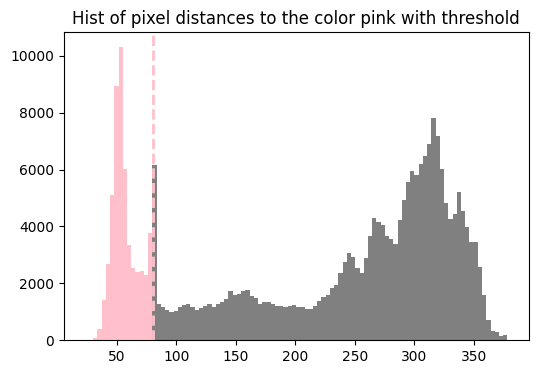

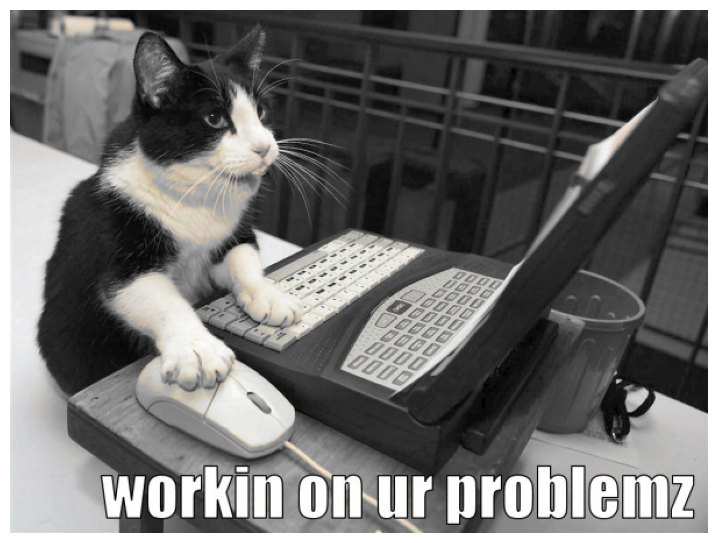

In [ ]:
# проверка работоспособности функции
mask_color('error-lolcat-problemz.jpg', 'pink', sensitivity=0.8, return_mask=False)

## Результат домашнего задания

1.   Новый пункт
2.   Новый пункт



Результатом выполнения домашнего задания является заполнение выделенных ячеек Вашим кодом

## Критерии оценивания

К1 - за каждое правильно решенное задание +2 балла

Максимальное количество баллов —  10 баллов

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 6 баллов
